# **Proyecto integrado 1**

Trabajo para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

## **Paso 1. Abre el archivo de datos y estudia la información general**

Ruta de archivo:

/datasets/games.csv .

### Inicialización de librerías

In [4]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
from datetime import datetime

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5160\258703025.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Cargar datos

In [5]:
# Ruta del archivo CSV
games_file = "games.csv"

games_df = pd.read_csv(games_file)

games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## **Paso 2. Preparar los datos**

- **Reemplazar los nombres de las columnas por minúsculas.**

In [7]:
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

for i in games_df.columns:
  print(i)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


- **Convertir los datos en los tipos necesarios.**

Dado el resumen de la información (`info()`) proporcionado, podemos identificar algunas columnas que podrían requerir cambios en el tipo de datos para realizar cálculos futuros de manera más eficiente. Aquí están las consideraciones para cada columna:

1. **Year_of_Release (Año de lanzamiento):** Actualmente es de tipo `float64`. Dado que representa años, sería más adecuado cambiarlo a tipo de datos `int` para eliminar los decimales y representarlos como números enteros.

2. **User_Score (Puntuación de usuario):** Actualmente es de tipo `object`, lo cual indica que podría contener datos no numéricos. Dado que representa una puntuación, sería más adecuado cambiarlo a tipo de datos `float` para realizar cálculos numéricos con él. Sin embargo, primero necesitamos asegurarnos de que todos los valores en esta columna sean numéricos o convertibles a numéricos. 

3. **Rating (Clasificación):** Actualmente es de tipo `object`. Si solo contiene categorías específicas, podríamos considerar cambiarlo a un tipo de datos categórico (`category`) para ahorrar memoria y permitir un análisis más eficiente.

Dado esto, sería prudente realizar los siguientes cambios de tipo de datos:

- Convertir la columna "Year_of_Release" a tipo `int`.
- Convertir la columna "User_Score" a tipo `float`.
- Convertir la columna "Rating" a tipo categórico (`category`) si solo contiene categorías específicas.


In [8]:
games_df['year_of_release']= games_df['year_of_release'].astype('Int64')
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['rating']= games_df['rating'].astype('category')

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


In [9]:
games_df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [10]:
# Convertir la columna 'year_of_release' al tipo float64
games_df["year_of_release"] = games_df["year_of_release"].astype("float64")

# Rellenar los valores ausentes en las columnas numéricas con la media
numeric_columns = ["year_of_release", "critic_score", "user_score"]
games_df[numeric_columns] = games_df[numeric_columns].fillna(
    games_df[numeric_columns].mean()
)

# Redondear los valores decimales en la columna 'year_of_release'
games_df["year_of_release"] = games_df["year_of_release"].round().astype("Int64")

# Rellenar los valores ausentes en las columnas categóricas con el valor más frecuente
categorical_columns = ["name", "genre", "rating"]
for column in categorical_columns:
    games_df[column].fillna(games_df[column].mode()[0], inplace=True)

# Verificar si todavía hay valores ausentes
print(games_df.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5160\1156022869.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_df[column].fillna(games_df[column].mode()[0], inplace=True)


In [11]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,E


## Paso 3: Analiza los datos

- Número de juegos lanzados en diferentes años

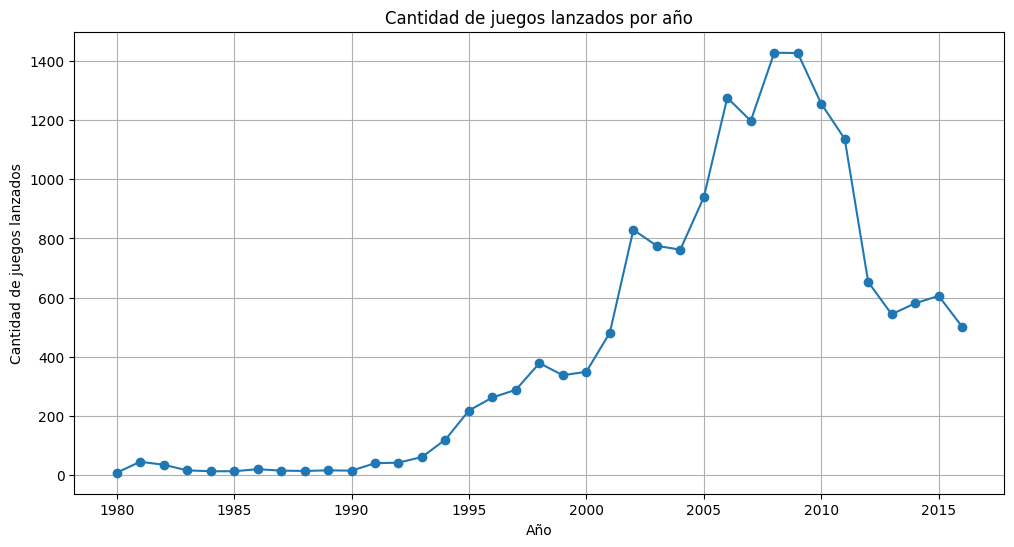

In [12]:
# Calcular la cantidad de juegos lanzados en cada año
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Visualizar la distribución de los lanzamientos de juegos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos lanzados')
plt.grid(True)
plt.show()
